# Project: Wrangling and Analyze Data

In [8]:
import requests
import numpy as np
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tweepy import OAuthHandler
from datetime import datetime
from functools import reduce
from timeit import default_timer as timer

In [9]:
pip install tweepy

# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [10]:
twitter_archive_df= pd.read_csv("twitter-archive-enhanced-2.csv")

twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [11]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open("image_predictions-3.tsv", mode = "wb") as file:
    file.write(response.content)
    
    
image_predictions_df = pd.read_csv('image-predictions-3.tsv', sep='\t')
image_predictions_df.head()    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
#keys and token to access the API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
api

In [13]:
data = []

with open("tweet_json.txt", "r") as file:
    for line in file:
        tweets_data = json.loads(line)
        data.append({
                "tweet_id": tweets_data["id"],
                "retweets": tweets_data["retweet_count"],
                "favorites": tweets_data["favorite_count"],               
            })
                        
            
tweets_df = pd.DataFrame(data, columns = ["tweet_id", "retweets", "favorites"])
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assessing twitter_archive_df:

In [14]:
twitter_archive_df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1911,674410619106390016,NaN,NaN,2015-12-09 02:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674410619...,10,10,Lenny,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
737,780858289093574656,NaN,NaN,2016-09-27 19:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780858289...,10,10,Dash,None,None,None,None
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
587,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None


In [15]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
#since I couldn't display all the names from the previous code block I used this way to see all the dog names.
names = twitter_archive_df['name'].unique()
names.sort()
names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [18]:
doggo = twitter_archive_df['doggo'].value_counts()
doggo

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
floofer = twitter_archive_df['doggo'].value_counts()
floofer

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
pupper = twitter_archive_df['doggo'].value_counts()
pupper

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
puppo = twitter_archive_df['doggo'].value_counts()
puppo

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
twitter_archive_df[twitter_archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_archive_df[twitter_archive_df['rating_numerator']==1].text

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object

In [27]:
twitter_archive_df[twitter_archive_df['rating_numerator']==8].text

599     RT @dog_rates: Here we see a rare pouched pupp...
745     RT @dog_rates: This is Hank. He's mischievous ...
764     RT @dog_rates: Meet Gerald. He's a fairly exot...
835     Meet Gerald. He's a fairly exotic doggo. Floof...
859     This is Clark. He collects teddy bears. It's a...
                              ...                        
2315    This is Christoper. He is a spotted Penne. Can...
2331    Here we have a mixed Asiago from the Galápagos...
2340    Can stand on stump for what seems like a while...
2346    Here is the Rand Paul of retrievers folks! He'...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 102, dtype: object

### Quality and Tidiness issues twitter_archive_df:

* The column tweet_id has type integer nested of string.


* Some dog names aren't real or valid like "a, an, mad, his, not, old, my, such...etc"


* Some dog names has None value and it should replaced with NaN.


* The columns timestamp and retweeted_status_timestamp are type of string nested of datetime.


* The dog stages are divided into 4 columns which are "doggo, floofer, pupper or puppo" nested of combined as one column.


* The source column contain part of HTML code nested of just the source.


* The four dog stages has None nested of NaN.


* Some of the gathered tweets are retweets and it should be removed.


* There's columns that hard to read and it won't be needed.


## Assessing image_predictions_df:

In [28]:
image_predictions_df.head(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [29]:
image_predictions_df.shape

(2075, 12)

In [30]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
image_predictions_df[image_predictions_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
image_predictions_df.p1.count()

2075

In [34]:
image_predictions_df.p2.count()

2075

In [35]:
image_predictions_df.p3.count()

2075

### Quality and Tidiness issues image_predictions_df:

* There are 2356 tweets in the dataset twitter_archive_df but there are only 2075 in image_predictions_df dataset.


* The column tweet_id is an integer nested of string.


* The dog breeding type columns (p1, p2, p3) have underscores instead of white spaces.


* This dataset should be merged with the previous one.

## Assessing tweets_df:

In [36]:
tweets_df.head(8)

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848


In [37]:
tweets_df.shape

(2354, 3)

In [38]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [39]:
tweets_df[tweets_df.duplicated()]

,tweet_id,retweets,favorites


In [40]:
tweets_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

### Quality and Tidiness issues tweets_df:

* There are 2356 tweets in the dataset twitter_archive_df but there are only 2354 in image_predictions_df dataset.


* The column tweet_id is an integer nested of string.


* This dataset should be merged with the previous two datasets.

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
twitter_archive_clean_df=twitter_archive_df.copy()
image_predictions_clean_df=image_predictions_df.copy()
tweets_clean_df=tweets_df.copy()

### Issue #1:There's many dataframe's it will be better if we merge it and clean it as one dataframe.
### Issue #2: Solve the  mismatch number of tweets for the 3 dataframes.

#### Hint: Issue's might be solve togather..

#### Define: merge all the dataframes togather:

#### Code

In [42]:
merge_clean_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), [twitter_archive_clean_df, tweets_clean_df, image_predictions_clean_df])

#### Test

In [43]:
merge_clean_df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [44]:
merge_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #3:some of the gathered tweets are retweets:

#### Define: some of the gathered tweets are retweets and it should be removed.

#### Code

In [45]:
merge_clean_df = merge_clean_df[merge_clean_df['retweeted_status_id'].isnull()]

#### Test

In [46]:
retweeted_sum=merge_clean_df.retweeted_status_id.value_counts()
sum(retweeted_sum)

0

### Issue #4: there's unnecessary columns:

#### Define: drop the unnecessary columns:

#### Code

In [47]:
merge_clean_df.drop(["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

#### Test

In [48]:
merge_clean_df.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [49]:
merge_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweets            1994 non-null   int64  
 13  favorites           1994 non-null   int64  
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   int64  
 16  p1    

### Issue #5: The column tweet_id is an integer nested of string:

#### Define: change tweet_id from integer to string

#### code

In [50]:
merge_clean_df['tweet_id'] = merge_clean_df['tweet_id'].astype(str)

#### Test

In [51]:
merge_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweets            1994 non-null   int64  
 13  favorites           1994 non-null   int64  
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   int64  
 16  p1    

### Issue #6: The column timestamp is type of string nested of datetime:

#### Define: change the column timestamp from string to datetime

#### Code

In [52]:
merge_clean_df.timestamp = pd.to_datetime(merge_clean_df.timestamp)

#### Test

In [53]:
merge_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  retweets            1994 non-null 

### Issue #7: Some dog names aren't real or valid like "a, an, mad, his, not, old, my, such...etc":
### Issue #8: There're a lot of None value's in dog name columns:

#### Define: we need to change these dogs names to NaN because it seems it was extract in a wrong way from the tweets and fix the None's by replacing it with NaN.

#### Code

In [54]:
NameList= ['None','a','an','mad','his','this','not','old', 'my', 'such', 'actually', 'all', 'by', 'getting', 'incredibly',
           'just', 'infuriating', 'life', 'light', 'one', 'quite', 'space','unacceptable', 'very', 'the', 'officially']
for Xname in NameList:    
     merge_clean_df.name[merge_clean_df.name == Xname] = 'NaN'

C:\Users\User\AppData\Local\Temp\ipykernel_7800\2323365512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_clean_df.name[merge_clean_df.name == Xname] = 'NaN'
C:\Users\User\AppData\Local\Temp\ipykernel_7800\2323365512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_clean_df.name[merge_clean_df.name == Xname] = 'NaN'
C:\Users\User\AppData\Local\Temp\ipykernel_7800\2323365512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

#### Test

In [55]:
merge_clean_df.name.value_counts()

NaN           644
Charlie        11
Cooper         10
Lucy           10
Oliver         10
             ... 
Leela           1
Glenn           1
Shelby          1
Sephie          1
Christoper      1
Name: name, Length: 914, dtype: int64

In [56]:
names = merge_clean_df['name'].unique()
names.sort()
names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe',
       'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella',
       'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb',
       'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'B

### Issue #9: there's 4 columns should be merged in one column as dog stage:
### Issue #10: replace the None for these 4 columns into NaN

#### Define: The dog stages are divided into 4 columns which are "doggo, floofer, pupper or puppo" nested of combined as one column and replace the None's to NaN.

#### Code

In [57]:
merge_clean_df['dog_stage'] = merge_clean_df['text'].str.extract('(doggo|pupper|puppo|floofer)')
merge_clean_df = merge_clean_df.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis=1)

#### Test

In [58]:
merge_clean_df.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN


In [59]:
dog_stages = merge_clean_df['dog_stage'].unique()
dog_stages

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #11: The source column contain part of HTML code nested of just the source.:

#### Define: The source column contain part of HTML code nested of just the source and we will fix it.

#### Code

In [60]:
merge_clean_df.source = merge_clean_df.source.str.extract("\>(.*?)\<", expand = True)

#### Test

In [61]:
merge_clean_df.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN


### Issue #12:Some columns have underscores instead of white spaces:

#### Define: The dog breeding type columns (p1, p2, p3) have underscores instead of white spaces.

#### Code

In [62]:
merge_clean_df.p1 = merge_clean_df.p1.str.replace("_", " ")

In [63]:
merge_clean_df.p2 = merge_clean_df.p2.str.replace("_", " ")

In [64]:
merge_clean_df.p3 = merge_clean_df.p3.str.replace("_", " ")

#### Test

In [65]:
merge_clean_df.p1.value_counts()

golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
nail                    1
timber wolf             1
espresso                1
bib                     1
desktop computer        1
Name: p1, Length: 374, dtype: int64

In [66]:
merge_clean_df.p1.value_counts()

golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
nail                    1
timber wolf             1
espresso                1
bib                     1
desktop computer        1
Name: p1, Length: 374, dtype: int64

In [67]:
merge_clean_df.p3.value_counts()

Labrador retriever    76
Chihuahua             57
golden retriever      46
Eskimo dog            36
kelpie                33
                      ..
passenger car          1
bannister              1
rotisserie             1
hand blower            1
partridge              1
Name: p3, Length: 405, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
merge_clean_df.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [69]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")
twitter_archive_analyze =twitter_archive_master.copy()

### Insight 1: What is the top10 dog breeds per favorites for each algorithm ?


In [70]:
temp = twitter_archive_analyze[["p1","p2","p3","favorites"]].groupby("favorites", as_index = False).sum()
breed_per_favorites=temp.sort_values("favorites", ascending = False).head(10)
breed_per_favorites

,favorites,p1,p2,p3
1849,132810,Lakeland terrier,Labrador retriever,Irish terrier
1848,131075,Labrador retriever,ice bear,whippet
1847,107956,English springer,Boston bull,Cardigan
1846,107015,Chihuahua,Pomeranian,toy terrier
1845,106827,French bulldog,Boston bull,pug
1844,95450,standard poodle,toy poodle,Tibetan terrier
1843,85011,golden retriever,Great Pyrenees,Labrador retriever
1842,75639,Arabian camel,house finch,cocker spaniel
1841,75193,Angora,malamute,Persian cat
1840,75163,Eskimo dog,Siberian husky,malamute


In [71]:
def plot(x, y, title="", xlabel="", ylabel="", rotation=0):
    plt.figure(figsize=(15,9))
    bar_list = plt.barh(x,y)
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.show()

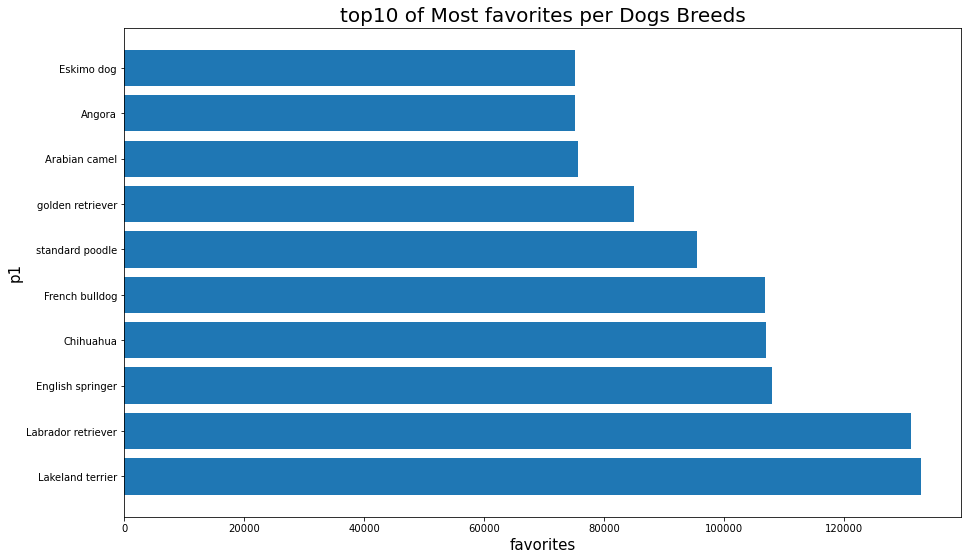

In [72]:
plot(breed_per_favorites.p1,breed_per_favorites.favorites, title="top10 of Most favorites per Dogs Breeds",xlabel="favorites",ylabel="p1")

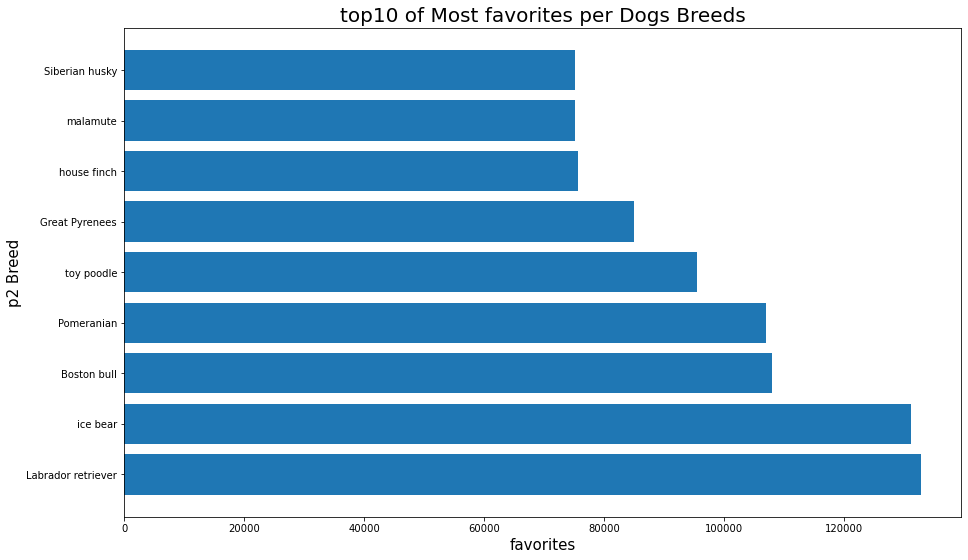

In [73]:
plot(breed_per_favorites.p2,breed_per_favorites.favorites, title="top10 of Most favorites per Dogs Breeds",xlabel="favorites",ylabel="p2 Breed")

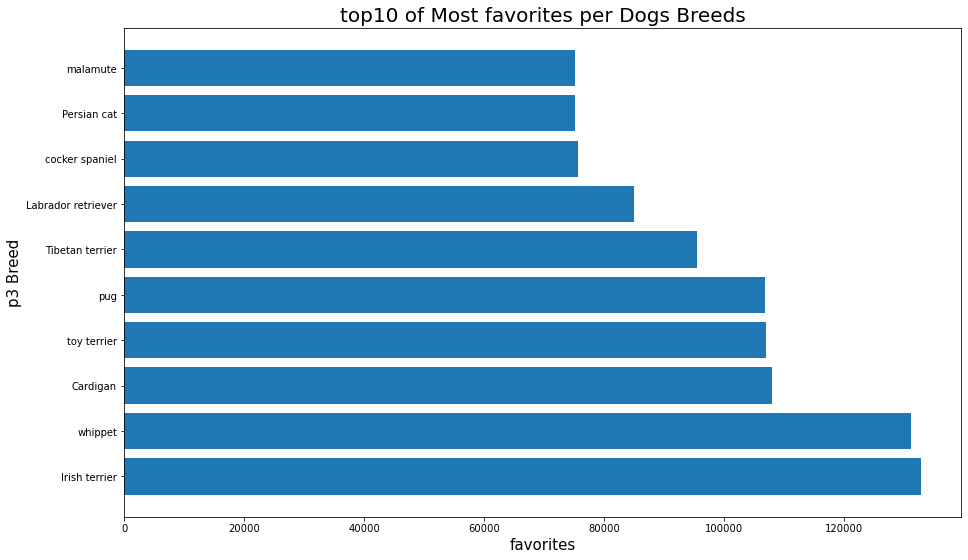

In [74]:
plot(breed_per_favorites.p3,breed_per_favorites.favorites, title="top10 of Most favorites per Dogs Breeds",xlabel="favorites",ylabel="p3 Breed")

### Insight 2: What is the most common dog name for dogs?

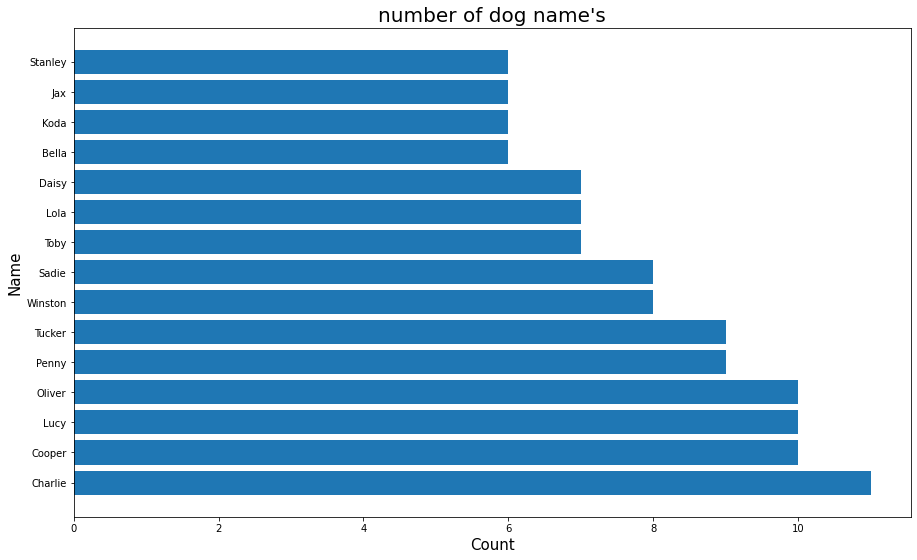

In [75]:
common_names = twitter_archive_analyze['name'].value_counts().head(15)
plot(common_names.index,common_names.values, title="number of dog name's",xlabel="Count",ylabel="Name")

### Insight 3: What is the most common dog stage?

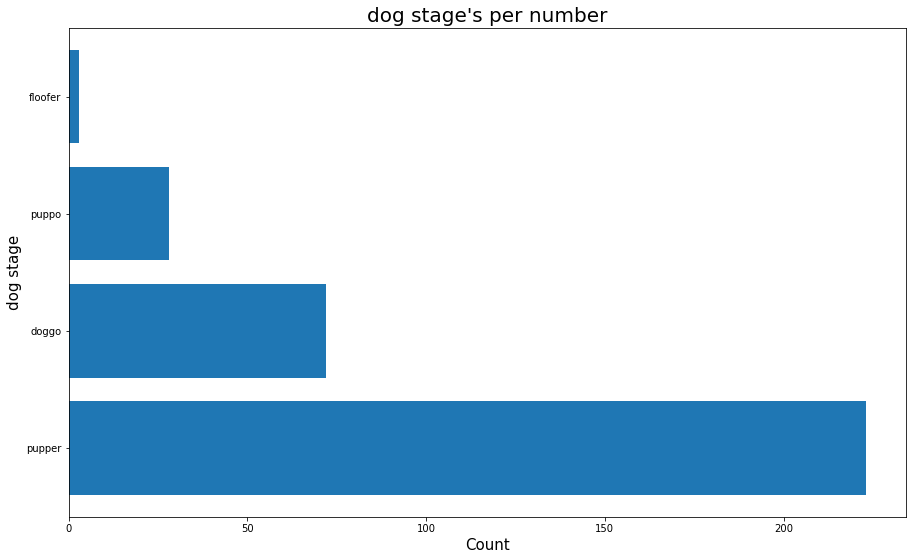

In [76]:
common_dog_stage = twitter_archive_analyze['dog_stage'].value_counts()
plot(common_dog_stage.index,common_dog_stage.values, title="dog stage's per number",xlabel="Count",ylabel="dog stage")

### Insight 4: what is the highest rating for dog breed for each of the 3 algorithms?

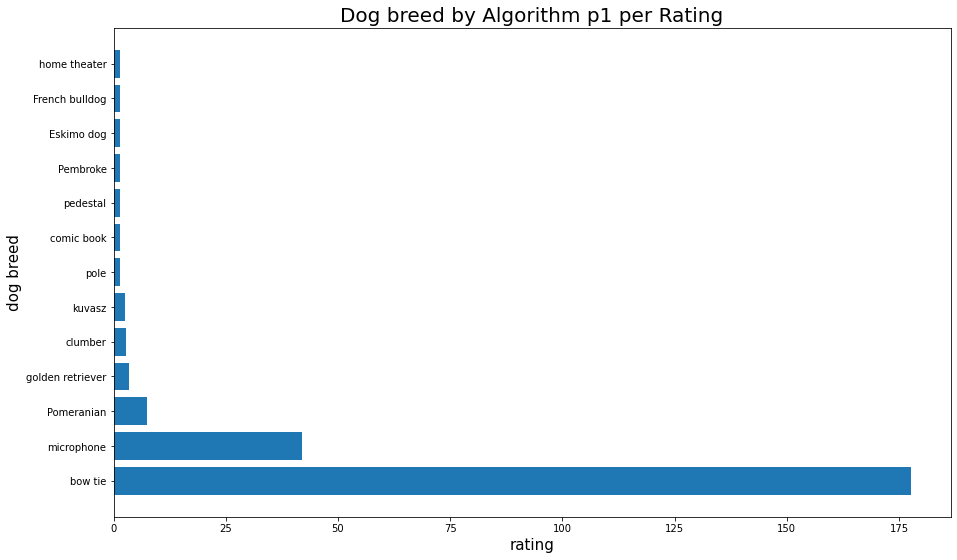

In [77]:
twitter_archive_analyze['rating'] = twitter_archive_analyze['rating_numerator'] / twitter_archive_analyze['rating_denominator']
breed_per_rating1=twitter_archive_analyze[["p1", "rating"]].sort_values("rating", ascending = False).head(15)
plot(breed_per_rating1.p1,breed_per_rating1.rating, title="Dog breed by Algorithm p1 per Rating",xlabel="rating",ylabel="dog breed")

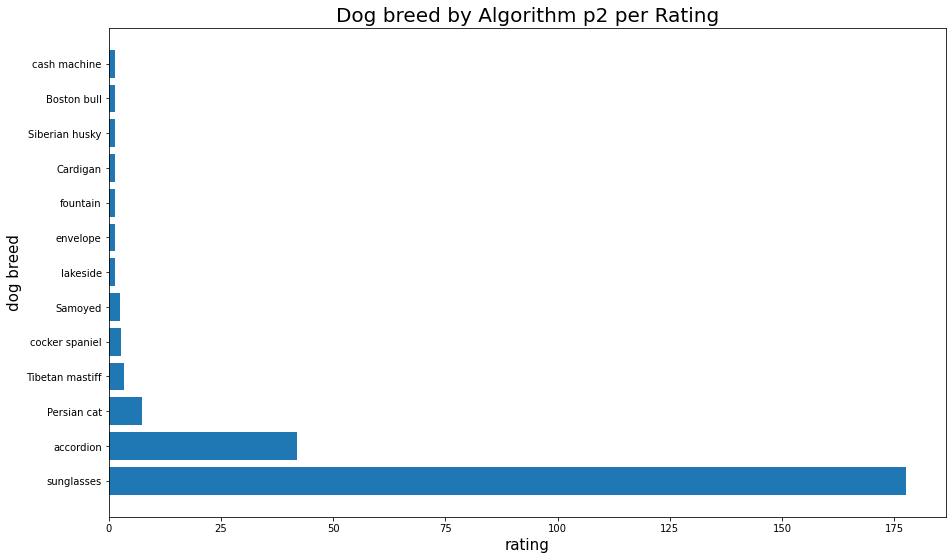

In [78]:
breed_per_rating2=twitter_archive_analyze[["p2", "rating"]].sort_values("rating", ascending = False).head(15)
plot(breed_per_rating2.p2,breed_per_rating2.rating, title="Dog breed by Algorithm p2 per Rating",xlabel="rating",ylabel="dog breed")

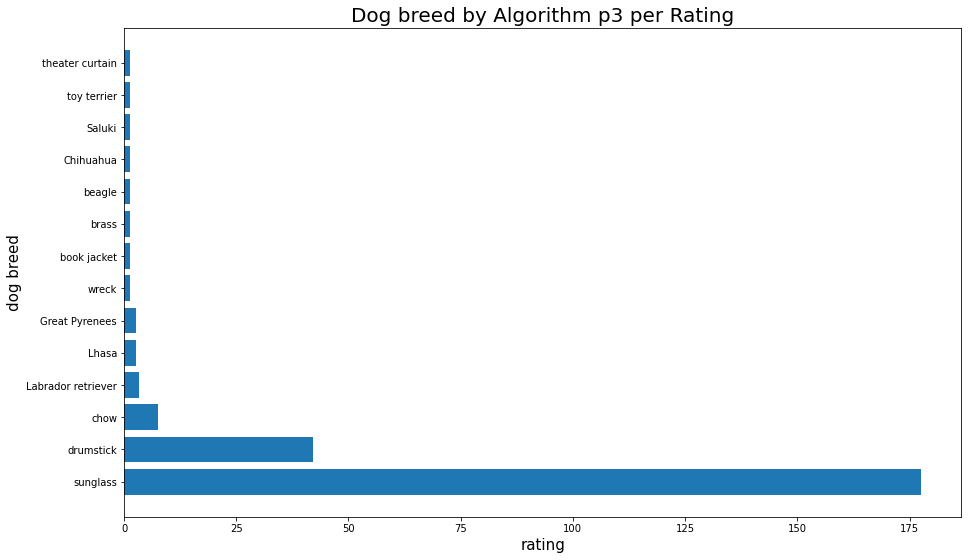

In [79]:
breed_per_rating3=twitter_archive_analyze[["p3", "rating"]].sort_values("rating", ascending = False).head(15)
plot(breed_per_rating3.p3,breed_per_rating3.rating, title="Dog breed by Algorithm p3 per Rating",xlabel="rating",ylabel="dog breed")

### Insight 5: what is the highest rating for dog stages?

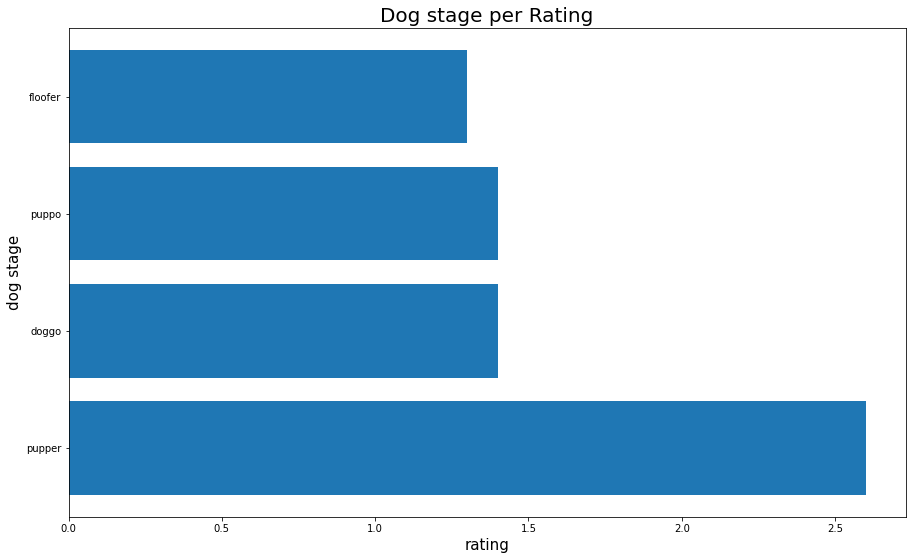

In [80]:
twitter_archive_analyze.dropna(subset=['dog_stage'], how='all', inplace=True)
dog_stage_per_rating=twitter_archive_analyze[["dog_stage", "rating"]].sort_values("rating", ascending = False)
plot(dog_stage_per_rating.dog_stage,dog_stage_per_rating.rating, title="Dog stage per Rating",xlabel="rating",ylabel="dog stage")